---
title: Holiday Movies
author: Ryan Horn
date: 2025-04-09
categories: [Python coding] # tags for a blog post (e.g., python)
image: 'holiday_movie_pic.jpeg'

toc: true
---

# load the data


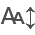

Index(['tconst', 'title_type', 'primary_title', 'simple_title', 'year',
       'runtime_minutes', 'average_rating', 'num_votes'],
      dtype='object')

In [11]:
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=False)

# Load the holiday movies dataset
holiday_movies = pd.read_csv("https://bcdanl.github.io/data/holiday_movies.csv")

# Load the holiday movie genres dataset
holiday_movie_genres = pd.read_csv("https://bcdanl.github.io/data/holiday_movie_genres.csv")

holiday_movie_genres.columns
holiday_movies.columns


# Explore data through various pandas operations

In [5]:
total_movies = holiday_movies.shape[0]
print('Total number of movies:', total_movies)

total_genres = holiday_movie_genres['genres'].value_counts()
print('Number of movies per genre:')
print(total_genres)

Total number of movies: 2265
Number of movies per genre:
genres
Comedy         1025
Drama           828
Romance         737
Family          707
Animation       268
Fantasy         185
Adventure       117
Documentary     101
Short            96
Music            91
Musical          78
Horror           63
Crime            44
Mystery          37
Thriller         32
Action           31
Sci-Fi           14
History          13
War               9
Western           6
Biography         6
Sport             5
Film-Noir         2
Talk-Show         2
News              1
Reality-TV        1
Name: count, dtype: int64


In [6]:
sorted_movies = holiday_movies.sort_values(by='average_rating', ascending=False)
print('Top 5 movies by average rating')
print(sorted_movies[['primary_title','average_rating']].head())

Top 5 movies by average rating
                       primary_title  average_rating
1204         NLO Spirit of Christmas            10.0
1433         Bringing Back Christmas             9.9
1522               Christmas Bone Us             9.8
1601    Cheap vs. Expensive Xmas Day             9.5
519   Marie Osmond's Merry Christmas             9.4


In [7]:
highly_rated_movies = holiday_movies[holiday_movies['average_rating'] >= 8]
print("Movies with average rating >= 8:")
print(highly_rated_movies[['primary_title', 'average_rating']].head())


Movies with average rating >= 8:
                        primary_title  average_rating
45                  A Christmas Carol             8.1
48                      Roman Holiday             8.0
65          A Charlie Brown Christmas             8.3
68    How the Grinch Stole Christmas!             8.3
73  The Homecoming: A Christmas Story             8.3


In [10]:
movies_2000_onwards = holiday_movies[holiday_movies['year'] >= 2000]
print("Movies released in or after 2000:")
show(movies_2000_onwards[['primary_title', 'year']])


Movies released in or after 2000:


In [12]:
movies_with_genres = pd.merge(holiday_movies, holiday_movie_genres, on='tconst', how='left')
print('Movies with their genres:')
show(movies_with_genres[['primary_title', 'genres']])


Movies with their genres:


## Top 5 Genres: Votes vs. Ratings by Title Type


/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


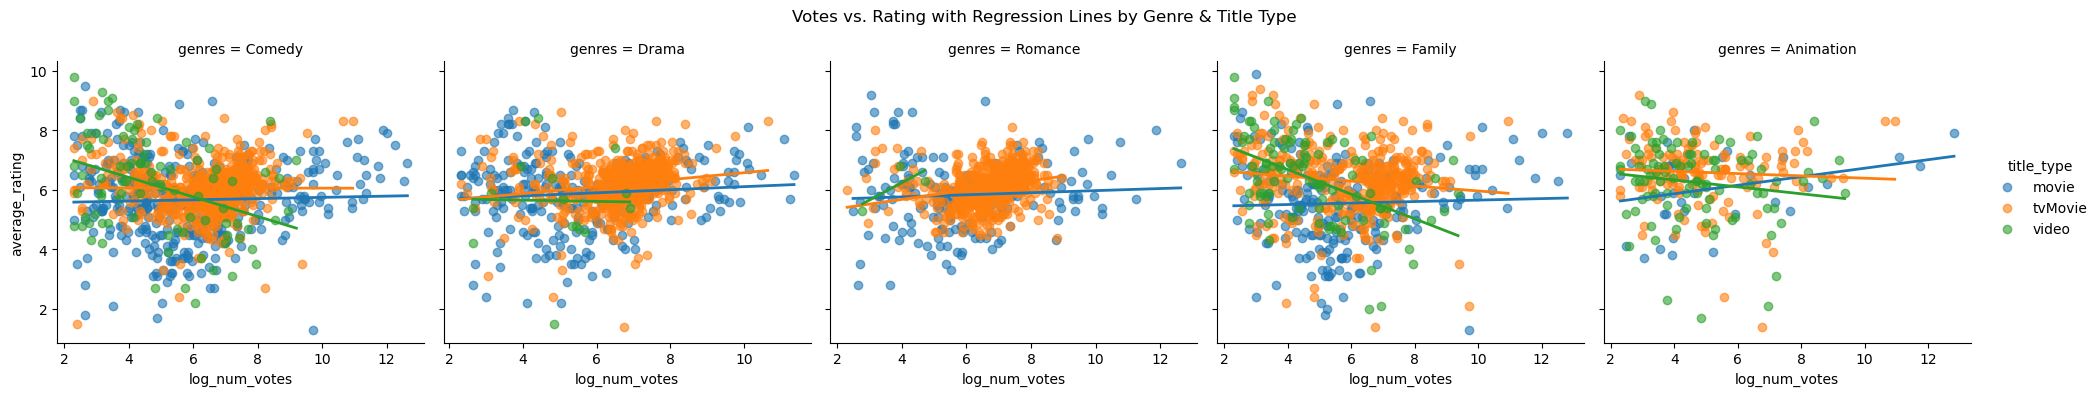

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
movies = pd.read_csv("https://bcdanl.github.io/data/holiday_movies.csv")
genres = pd.read_csv("https://bcdanl.github.io/data/holiday_movie_genres.csv")

# 1. Identify the five genres with the highest film counts
top5 = genres['genres'].value_counts().nlargest(5).index.tolist()

# 2. Merge on tconst, filter to those top genres, and add log(num_votes)
df = (
    movies
    .merge(genres, on='tconst')
    .query("genres in @top5")
    .assign(log_num_votes = lambda d: np.log(d['num_votes']))
)

# 3. Plot log(num_votes) vs. average_rating, faceted by genre & colored by title_type
sns.lmplot(
    data=df,
    x='log_num_votes', y='average_rating',
    col='genres', hue='title_type',
    sharex=False, sharey=True, height=4,
    scatter_kws={'alpha': 0.6},
    line_kws={'linewidth': 2},
    ci=None
)
plt.subplots_adjust(top=0.85)
plt.suptitle('Votes vs. Rating with Regression Lines by Genre & Title Type')
plt.show()

**Interpretation:**  
Documentaries exhibit the strongest positive relationship between vote count and rating—higher-voted docs almost always earn better reviews. Family and Drama films also trend upward, though with more spread: popular titles tend to have higher ratings but there are outliers. Comedy shows nearly no slope, indicating vote totals tell us little about comedic quality, while Romance sits in between. Across title types, Movies generally cluster at higher vote levels and ratings, whereas TV Shorts are more dispersed and tend to receive lower average ratings.
